# Project: Corona Sprint 4 in Machine Learning
## Team Name: Acceleration
## Team Member: Xiaofeng(Robbie), Robin, Ahmad, Riyao(Peter)
## Date: 11/29/2022

## TASK LIST
### TASK1 - Integrate New Variables (9 USA Macro Economic Variables)
### TASK2 - Select the best 40 Variables (including the one that you got)
### TASK3 - Preliminary Model for new Variables (Sprint 2)
### TASK4 - Add more variables into the models (Sprint 3)
### TASK5 - Trying Trees model (Sprint 3)
### TASK6 - Build for loops and functions to automative the modeling and testing, include lag_variables to consideration(Sprint 4)

# Libraries

In [1]:
import os
import gc
import datetime

import pandas as pd
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import numpy as np

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

import matplotlib.pyplot as plt

from sklearn import __version__ as sk_version

from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import metrics

from functools import reduce

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

import calendar as cl
from calendar import monthrange

from tqdm import tqdm

from sklearn.preprocessing import normalize

print('Packages importing successfully.')

Packages importing successfully.


# Functions

In [2]:
# get the dataframe's name
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [3]:
# get the lag_variables
def lag_variable(variable,n_lags):
    data=pd.DataFrame()
    variables_name=variable.columns.values
    for i in range(1,(n_lags+1)):
        for j in variables_name:
            name=str(j)+'lag_'+ str(i)
            variable[name]=variable[j].shift(i)
    #data = variable.dropna()  
    data = variable
    return data

In [4]:
# get the correlation including lag_variables
def lag_correlation(variable):
    sales_variable_lag = sales.merge(variable, left_index=True, right_index=True, how='left', indicator=True)
    corr = sales_variable_lag.corr()['Quantity'].sort_values(ascending=False)
    print(corr[(corr >= 0.5) | (corr <= -0.5)]) 

In [5]:
# functions for data transformation
def centering(data):
    new_data = (data-data.mean())
    return new_data

def nomalization(data): 
    new_data = (data-data.min())/(data.max()-data.min())
    return new_data

def standardization(data):
    new_data = (data-data.mean())/data.std()
    return new_data

def L1(data):
    #new_data = normalize(data, norm='l1')
    new_data = pd.DataFrame(normalize(data, norm='l1'))
    new_data = new_data.rename(columns = {0: "Quantity"})
    return new_data

def L2(data):
    #new_data = normalize(data, norm='l2')
    new_data = pd.DataFrame(normalize(data, norm='l2'))
    new_data = new_data.rename(columns = {0: "Quantity"})
    return new_data    

def Max(data):
    new_data = pd.DataFrame(normalize(data, norm='max'))
    new_data = new_data.rename(columns = {0: "Quantity"})
    return new_data        
       

In [6]:
# linear regression function
def linearR(data, test_size, random_state):
    X = data.drop(['Quantity'], axis=1)
    y = data['Quantity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    LinearReg = LinearRegression() 
    LinearReg.fit(X_train, y_train) 

    y_Train_prediction = LinearReg.predict(X_train) 
    y_Test_prediction  = LinearReg.predict(X_test)  
    
    #Prediction_Plots(y_train, y_Train_prediction, y_test, y_Test_prediction)
    #Metrics_Printer(y_train, y_Train_prediction, y_test, y_Test_prediction)
    print("linear regression: ")
    print("training metrics: ", metrics.r2_score(y_train, y_Train_prediction), "    testing metrics: ", metrics.r2_score(y_test, y_Test_prediction))
    #print("testing metrics: ", metrics.r2_score(y_test, y_Test_prediction))

In [1]:
# ridge regression function
def ridgeR(data, test_size, random_state, alpha):
    X = data.drop(['Quantity'], axis=1)
    y = data['Quantity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    RidgeReg = Ridge(alpha=alpha)  #Default value for alpha = 1
    RidgeReg.fit(X_train, y_train)

    y_Train_prediction = RidgeReg.predict(X_train) 
    y_Test_prediction  = RidgeReg.predict(X_test)  
    
    #Prediction_Plots(y_train, y_Train_prediction, y_test, y_Test_prediction)
    #Metrics_Printer(y_train, y_Train_prediction, y_test, y_Test_prediction)
    print("ridge regression: ")
    print("training metrics: ", metrics.r2_score(y_train, y_Train_prediction), "    testing metrics: ", metrics.r2_score(y_test, y_Test_prediction))

In [8]:
# lasso regression function
def lassoR(data, test_size, random_state, alpha):
    X = data.drop(['Quantity'], axis=1)
    y = data['Quantity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    LassoReg = Lasso(alpha = alpha)  
    LassoReg.fit(X_train, y_train)

    y_Train_prediction = LassoReg.predict(X_train) #Predictions on training model
    y_Test_prediction  = LassoReg.predict(X_test)  #Predictions on testing model  
    
    #Prediction_Plots(y_train, y_Train_prediction, y_test, y_Test_prediction)
    #Metrics_Printer(y_train, y_Train_prediction, y_test, y_Test_prediction)
    print("lasso regression: ")
    print("training metrics: ", metrics.r2_score(y_train, y_Train_prediction), "    testing metrics: ", metrics.r2_score(y_test, y_Test_prediction))

In [9]:
# scatter plot 

def Prediction_Plots(y_train, y_Train_prediction, y_test, y_Test_prediction):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
#Training
    ax[0].scatter(y_train, y_Train_prediction)
    ax[0].set_ylim(-2,2)
    ax[0].set_xlim(-2,2)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')
#Testing
    ax[1].scatter(y_test, y_Test_prediction)
    ax[1].set_ylim(-2,2)
    ax[1].set_xlim(-2,2)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return()

In [10]:
# Matrics

def Metrics_Printer(y_train, y_Train_prediction, y_test, y_Test_prediction):
#Training 
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_Train_prediction))
    #print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_Train_prediction))  
    #print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_Train_prediction))  
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_Train_prediction)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_Test_prediction))
    #print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_Test_prediction))  
    #print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_Test_prediction))  
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_Test_prediction)))
    
    return()

In [11]:
# Box Plots function

def Multiple_Runner(x, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in range(1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        
        model = LinearRegression() #Creates the function
        model.fit(x_train, y_train) #Train the model
    
        y_Train_prediction  = model.predict(x_train)  #Predictions on training model
        y_Test_prediction   = model.predict(x_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_Train_prediction) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_Test_prediction)
    
        train_MSE = metrics.mean_squared_error(y_train, y_Train_prediction)
        test_MSE  = metrics.mean_squared_error(y_test, y_Test_prediction)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation:', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation:', np.std(Test_R2))

## Integrate New Variables (9 USA Macro Economic Variables)

### 1. sales data import

In [12]:
sales = pd.read_csv('Scaled_sales_porcelana.csv', encoding='latin-1', sep=',')
# Renaming the columns - English
sales.columns = ['date', 'Booking', 'Quantity', 'seasonal', 'trend_short_6', 'trend_short_12']
# Converting date to index
sales.index = pd.to_datetime(sales["date"])
sales = sales.drop(columns='date')
sales.head()

,Booking,Quantity,seasonal,trend_short_6,trend_short_12
date,,,,,
2017-01-01,0.780650,1.115820,0.609917,NaN,NaN
2017-02-01,0.140791,1.098511,1.462032,NaN,NaN
2017-03-01,-0.619820,-0.073592,-0.676013,NaN,NaN
2017-04-01,-1.229009,-0.962691,-2.031736,NaN,NaN
2017-05-01,-0.747583,-0.638951,-1.209845,NaN,NaN


In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-01 to 2021-12-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Booking         60 non-null     float64
 1   Quantity        60 non-null     float64
 2   seasonal        60 non-null     float64
 3   trend_short_6   54 non-null     float64
 4   trend_short_12  48 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


### import new Macroeconomic variables - Robbie

In [14]:
# import my data
new_variables_Robbi = pd.read_csv('US Marco data Robbie.csv')
# convert the Date to INDEX
new_variables_Robbi.index = pd.to_datetime(new_variables_Robbi['observation_date'])
new_variables_Robbi.drop("observation_date", axis = 1, inplace = True)
new_variables_Robbi = new_variables_Robbi.rename(columns = {"FEDFUNDS": "US Federal Funds Effective Rate", 
                                  "CPALTT01USM657N": "US Consumer Price Index", 
                                 "PCE": "US Personal Consumption Expenditures"})
new_variables_Robbi = new_variables_Robbi.dropna()
new_variables_Robbi.isna().sum()
new_variables_Robbi.head()

,US Federal Funds Effective Rate,US Consumer Price Index,US Personal Consumption Expenditures
observation_date,,,
2017-01-01,0.65,0.582773,13020.4
2017-02-01,0.66,0.314612,13038.6
2017-03-01,0.79,0.081280,13089.3
2017-04-01,0.90,0.296553,13114.1
2017-05-01,0.91,0.085472,13117.6


### New variables by Ahmad

In [15]:
# import my data
new_variables_AB = pd.read_csv('new_variables_Ahmad1.csv')
# convert the Date to INDEX
new_variables_AB.index = pd.to_datetime(new_variables_AB['observation_date'])
new_variables_AB.drop("observation_date", axis = 1, inplace = True)
new_variables_AB = new_variables_AB.dropna()

In [16]:
# import my data
new_variables_AB2 = pd.read_csv('new_variables_Ahmad2.csv')
# convert the Date to INDEX
new_variables_AB2.index = pd.to_datetime(new_variables_AB2['observation_date'])
new_variables_AB2.drop("observation_date", axis = 1, inplace = True)

### New varibales by Riyao (Peter)

In [17]:
# import my data
new_variables_P = pd.read_csv('Rental Vacancy Rate in the United States.csv')
# convert the Date to INDEX
new_variables_P.index = pd.to_datetime(new_variables_P['DATE'])
new_variables_P.drop("DATE", axis = 1, inplace = True)

In [18]:
# import my data
new_variables_P2 = pd.read_csv('Average Price Fuel Oil 2 per Gallon (3.785 Liters) in U.S. City Average.csv')
# convert the Date to INDEX
new_variables_P2.index = pd.to_datetime(new_variables_P2['DATE'])
new_variables_P2.drop("DATE", axis = 1, inplace = True)

In [19]:
# import my data
new_variables_P3 = pd.read_csv('TCU.csv')
# convert the Date to INDEX
new_variables_P3.index = pd.to_datetime(new_variables_P3['DATE'])
new_variables_P3.drop("DATE", axis = 1, inplace = True)

### New data by Robin

In [20]:
# import my data
new_variables_Robin = pd.read_csv('PrivateWages.csv')
new_variables_Robin = new_variables_Robin.rename(columns = {"Observation Value": "Private Wages"})
# convert the Date to INDEX
new_variables_Robin.index = pd.to_datetime(new_variables_Robin['date'])
new_variables_Robin.drop(["date", "Year", "Period", "Label"], axis = 1, inplace = True)

In [21]:
# import my data
new_variables_Robin2 = pd.read_csv('Import_Export.csv')
new_variables_Robin2 = new_variables_Robin2.rename(columns = {"Observation Value": "Import & Export"})
# convert the Date to INDEX
new_variables_Robin2.index = pd.to_datetime(new_variables_Robin2['date'])
new_variables_Robin2.drop(["date", "Year", "Period", "Label"], axis = 1, inplace = True)

In [22]:
# import my data
new_variables_Robin3 = pd.read_csv('AvgWeeklyHours.csv')
new_variables_Robin3 = new_variables_Robin3.rename(columns = {"Observation Value": "AvgWeeklyHours"})
# convert the Date to INDEX
new_variables_Robin3.index = pd.to_datetime(new_variables_Robin3['date'])
new_variables_Robin3.drop(["date", "Year", "Period", "Label"], axis = 1, inplace = True)
new_variables_Robin3 = lag_variable(new_variables_Robin3,3)
new_variables_Robin3 = new_variables_Robin3.drop(columns = ['AvgWeeklyHours', 'AvgWeeklyHourslag_1', 'AvgWeeklyHourslag_2'])

### Summary 
#### new macro economy variables list: 
    Robbie: 1.US Federal Funds Effective Rate, 2.US Consumer Price Index, 3.US Personal Consumption Expenditures
    Ahmad: 4.Unemployment Rate, 5.Retail Sales (% Change), 6.Real GDP Per Capita
    Peter: 7.Capacity Utilization:Total Index(TCU), 8.US Average Price:Fuel Oil per Gallon(APU), 9.US Rental Vacancy Rate
    Robin: 10.US Average weekly working hour, 11.US import/export price indexes, 12.US Private wages and salary
#### sum up the significant variables from all members, we get some best lists here:
               name                              /    correlation 
    1. US Personal Consumption Expenditures      /    0.620402
    2. US Consumer Price Index                   /    0.471517
    3. Unemployment Rate                         /   -0.415215
    4. Real GDP Per Capita                       /    0.700972
    5. TCU                                       /    0.473869
    6. APU000072511                              /    0.301247
    7. Import & Export                           /    0.519593
    8. AvgWeeklyHours                            /    0.515838

# Combine all the new variables togather 

In [23]:
total = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [sales,new_variables_Robbi, new_variables_AB, new_variables_AB2, new_variables_P2, new_variables_P3, new_variables_Robin2, new_variables_Robin3])
combined_var = total.drop(columns=['Booking', 'seasonal', 'trend_short_6', 'trend_short_12', 'US Federal Funds Effective Rate', 'Retail Sales (% Change)'])

combined_var = combined_var.rename(columns = {"US Consumer Price Index": "US CPI", 
                                  "US Personal Consumption Expenditures": "US PCE", "Unemployment Rate": "U Rate",
                                 "Real GDP Per Capita": "RGDP/Cap", "Average Price Fuel Oil": "AOP", 'Import & Export': 'IMEX', 'AvgWeeklyHourslag_3': 'AvgWkHrslag_3' })
combined_var

,Quantity,US CPI,US PCE,U Rate,RGDP/Cap,AOP,TCU,IMEX,AvgWkHrslag_3
2017-01-01,1.115820,0.582773,13020.4,4.7,54866.0,2.482,75.2623,121.6,NaN
2017-02-01,1.098511,0.314612,13038.6,4.6,54866.0,2.474,75.0381,122.0,NaN
2017-03-01,-0.073592,0.081280,13089.3,4.4,54866.0,2.449,75.5665,122.1,NaN
2017-04-01,-0.962691,0.296553,13114.1,4.4,55057.0,2.438,76.3559,122.4,34.4
2017-05-01,-0.638951,0.085472,13117.6,4.4,55057.0,2.378,76.4721,121.7,34.3
2017-06-01,-0.198644,0.090711,13170.3,4.3,55057.0,2.284,76.6685,121.6,34.3
2017-07-01,0.599377,-0.068992,13193.5,4.3,55413.0,2.215,76.6079,122.2,34.4
2017-08-01,-0.248960,0.299445,13234.1,4.4,55413.0,2.292,76.3392,122.9,34.4
2017-09-01,-0.706704,0.529491,13353.4,4.3,55413.0,2.481,76.4937,123.9,34.4
2017-10-01,-0.655682,-0.063204,13383.4,4.2,55877.0,2.520,77.5402,124.0,34.4


In [24]:
combined_var.shape

(61, 9)

In [25]:
combined_var = combined_var.dropna()
combined_var.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2017-04-01 to 2021-10-01
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Quantity       55 non-null     float64
 1   US CPI         55 non-null     float64
 2   US PCE         55 non-null     float64
 3   U Rate         55 non-null     float64
 4   RGDP/Cap       55 non-null     float64
 5   AOP            55 non-null     float64
 6   TCU            55 non-null     float64
 7   IMEX           55 non-null     float64
 8   AvgWkHrslag_3  55 non-null     float64
dtypes: float64(9)
memory usage: 4.3 KB


In [26]:
# remove the duplicate index for the pair scatter plots 
combined_var = combined_var[~combined_var.index.duplicated()]
# scatter plots for every variables 
#sns.pairplot(combined_var)

<AxesSubplot:>

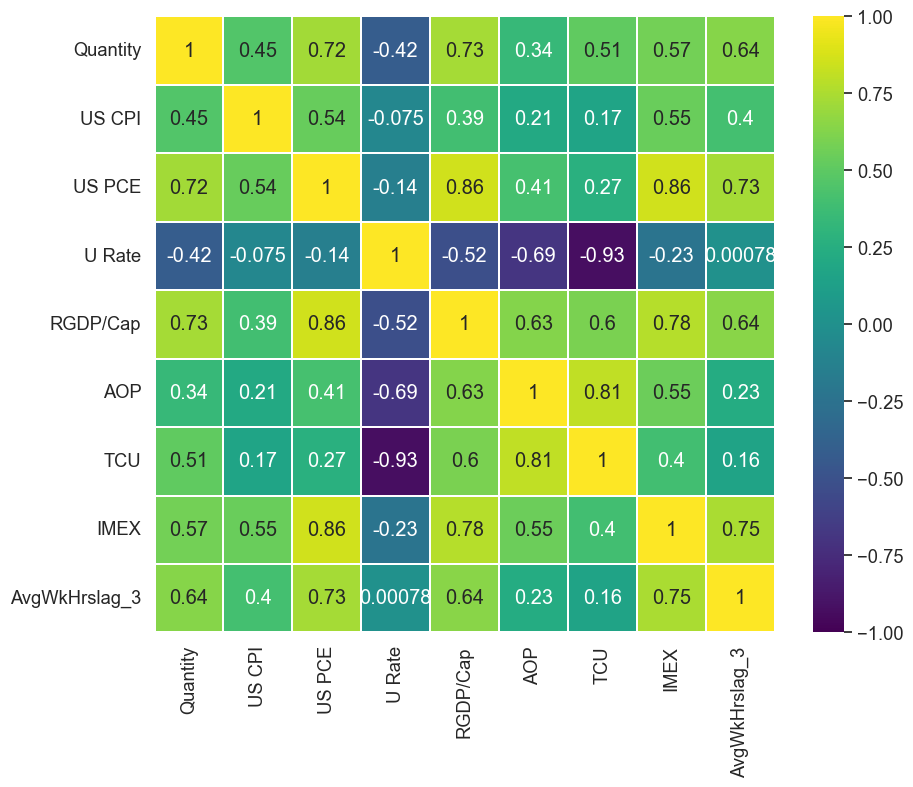

In [27]:
combined_var_Correlation = combined_var.corr() 
plt.figure(figsize = (10,8))
sns.heatmap(combined_var_Correlation, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

## Select the best 40 Variables (including the one that you got)

### copy the process from Corona's 'Porcelain_Adelphi_ScaledData_2022'

In [28]:
# 1.calendar data
monthly_calendar = pd.read_csv('Holidays_colombia_2024.csv')
monthly_calendar.index = pd.to_datetime(monthly_calendar['Fecha'])
monthly_calendar.drop("Fecha", axis = 1, inplace = True)

# 2.macro data from Corona
macro = pd.read_csv('Macro_economic_var.csv', encoding='latin-1')
macro.columns = ['date', 'Construction_lic_unt','Construction_lic_area', 'Construction_lic_unt_SI','Construction_lic_unt_NO_SI',
            'Construction_lic_area_SI','Construction_lic_area_NO_SI' ,  'Gray_cement_prod', 'Gray_cement_dispatch', 
                 'Gray_cement_dispatch_Factory','Gray_cement_dispatch_comercial','Gray_cement_dispatch_contractor','Gray_cement_dispatch_other',
                 'DTF(interest_rate)','GDP_Constr', 'GDP_Total', 'Inflation', 'USD_exchange', 'Oil_brent', 'Oil_WTI', 'ISE', 'ICC', 'IEC','ICE','Retail_Commerce', 'Unemployment%', 
              'RADAR_Constr', 'RADAR_Rev', 'RADAR_Toilets', 'RADAR_HomeAppliance', 'RADAR_Paint', 'RADAR_Furniture', 'RADAR_Tools', 'RADAR_Elect',
             'RADAR_Plumbing', 'RADAR_Wood', 'RADAR_Supply', 'RADAR_Remodel', "Construction_lic_area/unt", "Construction_lic_area/unt_SI", "Construction_lic_area/unt_NO_SI"]
macro.index = pd.to_datetime(macro['date'])
macro.drop("date", axis = 1, inplace = True)
#macro = lag_variable(macro,4)

# 3.housing data 
camacol = pd.read_csv('Camacol_Housing.csv', encoding='latin-1', sep=',')
camacol.columns = ['date', 'Housing_total_launch', 'Housing_total_launch_SI', 'Housing_total_launch_NO_SI',
                   'Housing_total_initiation','Housing_total_initiation_SI', 'Housing_total_initiation_NO_SI',
                   'Housing_total_sales',  'Housing_total_sales_SI',  'Housing_total_sales_NO_SI', 
                   'Housing_total_offer','Housing_total_Offer_SI', 'Housing_total_Offer_NO_SI']
camacol.index = pd.to_datetime(camacol["date"])
camacol = camacol.drop(columns=['date'])

# 4.ICCV data
ICCV = pd.read_csv('ICCV.csv', encoding='latin-1')
ICCV = ICCV.loc[:, ~ICCV.columns.str.contains('^Unnamed')]
ICCV["Fecha"] = pd.to_datetime(ICCV["Fecha"],  infer_datetime_format=True, exact = False)
ICCV.columns = ['date', 'ICCV_Var_Yearly', 'ICCV_Var_Monthly']
ICCV.set_index("date", inplace = True)

# 5.credit data 
credit = pd.read_csv('credit_disb.csv', encoding='latin-1', sep=',')
credit.columns = ['date', 'Consumer_credit', 'Consumer_microcredit', 'Ordinary_credit', 'Preferencial_credit', 'loan_overdrafts', 'Credit_card', 'Treasury_loan',
                 'Housing_loan']
credit.index = pd.to_datetime(credit["date"])
credit = credit.drop(columns='date')

print("imported data successfully")

imported data successfully


## Get lag_variables for each datesets and calculate correlations 

In [29]:
total = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [sales, combined_var, monthly_calendar, macro, camacol, ICCV, credit])
lag_variable(total,12)
lag_correlation(total)

Quantity                               1.000000
Quantity_x                             1.000000
Quantity_y                             1.000000
Booking_x                              0.836565
Booking_y                              0.836565
Housing_total_sales                    0.823906
Gray_cement_dispatch                   0.797467
Gray_cement_dispatch_comercial         0.797301
Gray_cement_prod                       0.772772
Housing_total_sales_NO_SI              0.761414
Gray_cement_dispatch_other             0.745772
RGDP/Cap                               0.728973
Housing_total_sales_SI                 0.723095
US PCE                                 0.722993
ISE                                    0.700910
Housing_total_saleslag_1               0.690929
Quantity_ylag_1                        0.690518
working_day                            0.689586
Quantity_xlag_1                        0.687502
Gray_cement_dispatch_contractor        0.672378
Bookinglag_1                           0

### best 40 list:
    1. US Personal Consumption Expenditures      /    0.620402
    2. US Consumer Price Index                   /    0.471517
    3. Unemployment Rate                         /   -0.415215
    4. Real GDP Per Capita                       /    0.700972
    5. TCU                                       /    0.473869
    6. APU000072511                              /    0.301247
    7. Import & Export                           /    0.519593
    8. AvgWeeklyHours                            /    0.515838
 
 'working_day', 'holiday'
 
 'Booking',
 'Gray_cement_dispatch',
 'Gray_cement_dispatch_comercial',
 'Gray_cement_prod',
 'Gray_cement_dispatch_other',
 'ISE',
 'Gray_cement_dispatch_contractor',
 'Gray_cement_dispatch_Factory',
 'Retail_Commerce',
 'Oil_WTI',
 'Oil_brent',
 'seasonal',
 'Construction_lic_area',
 'DTF(interest_rate)'
 
 'Housing_total_sales',
 'Housing_total_sales_NO_SI',
 'Housing_total_sales_SI',
 'Housing_total_initiation',
 'Housing_total_launch',
 'Housing_total_initiation_SI',
 'Housing_total_launch_SI',
 'Housing_total_initiation_NO_SI',
 'Housing_total_Offer_NO_SI'
 
 'ICCV_Var_Yearly', 'ICCV_Var_Monthly'
 
 'Consumer_microcredit',
 'Consumer_credit',
 'Housing_loan',
 'Credit_card',
 'Treasury_loan'

## TOP 10 LIST Based on the Correlation and Meaning


    1. Gray_cement_dispatch_comercial  / Total Gray cement dispatch by distribution channel (Comercial |Colombia | Tons)
    
    2. housing_total_sold              / Total housing Sales
    
    3. ISE                             / Economy Monitoring Indicator: is a synthetic index whose purpose is to provide a 
                                         measure of the evolution of the real activity of the economy in the short term
                                         (% |Colombia) 
    
    4. Retail_Commerce                 / Variations of sales on the Retail Commerce
    
    5. GDP_Total                       / Total Gross Domestic Product (Colombia)
    
    6. RADAR_Toiletslag_4              / The percentage change rate of housing renovation expense (Toilets)(%)
    
    7. holiday                         / Total number of holiday 
    
    8. Consumer_microcredit            / Microcredit is a common form of microfinance that involves an extremely small loan 
                                         given to an individual to help them become self-employed or grow a small business.
                                          
    9. U Rate                          / the number of unemployed people as a percentage of the labor force in United States
    
    10. RGDP/Cap                       / measures the average level of national income (adjusted for inflation) per person.
                                         It gives a rough indication of average living standards. 

In [30]:
# make all the lag variables transform
monthly_calendar = lag_variable(monthly_calendar, 12) 
macro = lag_variable(macro, 12) 
camacol = lag_variable(camacol, 12) 
ICCV = lag_variable(ICCV, 12) 
credit = lag_variable(credit, 12)
combined_var = lag_variable(combined_var, 12)

In [31]:
# Merging all the DF
total_lag = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [sales, combined_var, macro, camacol, ICCV, credit, monthly_calendar])
total_lag = total_lag.rename(columns = {"Quantity_x": "Quantity", "working_day": "WorkingDay", "GDP_Constr": "GDPCon", "GDP_Total": "GTotal",
                                                                 "USD_exchange": "USDEx", "Housing_total_sales": "HTSales", 'Housing_total_offer': 'HTOffer', 'ICCV_Var_Yearly': 'ICCV Annu',
                                                                        "ICCV_Var_Monthly": "ICCV Monthly", "Consumer_credit": "ConsumerC", "Credit_card": "CC"})
total_lag

,Booking,Quantity,seasonal,trend_short_6,trend_short_12,Quantity_y,US CPI,US PCE,U Rate,RGDP/Cap,AOP,TCU,IMEX,AvgWkHrslag_3,Quantitylag_1,US CPIlag_1,US PCElag_1,U Ratelag_1,RGDP/Caplag_1,AOPlag_1,TCUlag_1,IMEXlag_1,AvgWkHrslag_3lag_1,Quantitylag_2,US CPIlag_2,US PCElag_2,U Ratelag_2,RGDP/Caplag_2,AOPlag_2,TCUlag_2,IMEXlag_2,AvgWkHrslag_3lag_2,Quantitylag_3,US CPIlag_3,US PCElag_3,U Ratelag_3,RGDP/Caplag_3,AOPlag_3,TCUlag_3,IMEXlag_3,AvgWkHrslag_3lag_3,Quantitylag_4,US CPIlag_4,US PCElag_4,U Ratelag_4,RGDP/Caplag_4,AOPlag_4,TCUlag_4,IMEXlag_4,AvgWkHrslag_3lag_4,...,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,WorkingDay,holidaylag_1,sundaylag_1,working_daylag_1,holidaylag_2,sundaylag_2,working_daylag_2,holidaylag_3,sundaylag_3,working_daylag_3,holidaylag_4,sundaylag_4,working_daylag_4,holidaylag_5,sundaylag_5,working_daylag_5,holidaylag_6,sundaylag_6,working_daylag_6,holidaylag_7,sundaylag_7,working_daylag_7,holidaylag_8,sundaylag_8,working_daylag_8,holidaylag_9,sundaylag_9,working_daylag_9,holidaylag_10,sundaylag_10,working_daylag_10,holidaylag_11,sundaylag_11,working_daylag_11,holidaylag_12,sundaylag_12,working_daylag_12
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.780650,1.115820,0.609917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.989981e+06,483448.34730,1.298812e+06,3.106784e+06,386289.55250,4.875376e+06,4.791147e+06,5.996089e+06,3.013613e+06,470541.32900,1.093819e+06,1,5,25,7.0,4.0,20.0,2.0,4.0,24.0,1.0,5.0,25.0,0.0,4.0,26.0,1.0,4.0,26.0,2.0,5.0,24.0,1.0,4.0,25.0,1.0,5.0,25.0,0.0,4.0,26.0,3.0,4.0,24.0,0.0,4.0,25.0,2.0,5.0,24.0
2017-02-01,0.140791,1.098511,1.462032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.814229e+06,632387.59210,1.627959e+06,4.068021e+06,438682.26790,6.513619e+06,6.137144e+06,6.675101e+06,2.989981e+06,483448.34730,1.298812e+06,0,4,24,1.0,5.0,25.0,7.0,4.0,20.0,2.0,4.0,24.0,1.0,5.0,25.0,0.0,4.0,26.0,1.0,4.0,26.0,2.0,5.0,24.0,1.0,4.0,25.0,1.0,5.0,25.0,0.0,4.0,26.0,3.0,4.0,24.0,0.0,4.0,25.0
2017-03-01,-0.619820,-0.073592,-0.676013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.283417e+06,549789.00000,1.454672e+06,4.941982e+06,531850.19260,7.315236e+06,6.120086e+06,8.140200e+06,3.814229e+06,632387.59210,1.627959e+06,1,4,26,0.0,4.0,24.0,1.0,5.0,25.0,7.0,4.0,20.0,2.0,4.0,24.0,1.0,5.0,25.0,0.0,4.0,26.0,1.0,4.0,26.0,2.0,5.0,24.0,1.0,4.0,25.0,1.0,5.0,25.0,0.0,4.0,26.0,3.0,4.0,24.0
2017-04-01,-1.229009,-0.962691,-2.031736,NaN,NaN,-0.962691,0.296553,13114.1,4.4,55057.0,2.438,76.3559,122.4,34.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.283417e+06,549789.00000,1.454672e+06,2,5,23,1.0,4.0,26.0,0.0,4.0,24.0,1.0,5.0,25.0,7.0,4.0,20.0,2.0,4.0,24.0,1.0,5.0,25.0,0.0,4.0,26.0,1.0,4.0,26.0,2.0,5.0,24.0,1.0,4.0,25.0,1.0,5.0,25.0,0.0,4.0,26.0
2017-05-01,-0.747583,-0.638951,-1.209845,NaN,NaN,-0.638951,0.085472,13117.6,4.4,55057.0,2.378,76.4721,121.7,34.3,-0.962691,0.296553,13114.1,4.4,55057.0,2.438,76.3559,122.4,34.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.347165e+06,677598.18360,1.864167e+06,4.353892e+06,433679.77720,5.854576e+06,4.445

In [32]:
corona_combined_var10 = total_lag[['Quantity', 'Gray_cement_dispatch_comercial','HTSales', 'ISE', 'Retail_Commerce', 'GTotal', 'RADAR_Toiletslag_4','holiday', 'Consumer_microcredit', 'U Rate', 'RGDP/Cap']]

corona_combined_var10 = corona_combined_var10.dropna()

<AxesSubplot:>

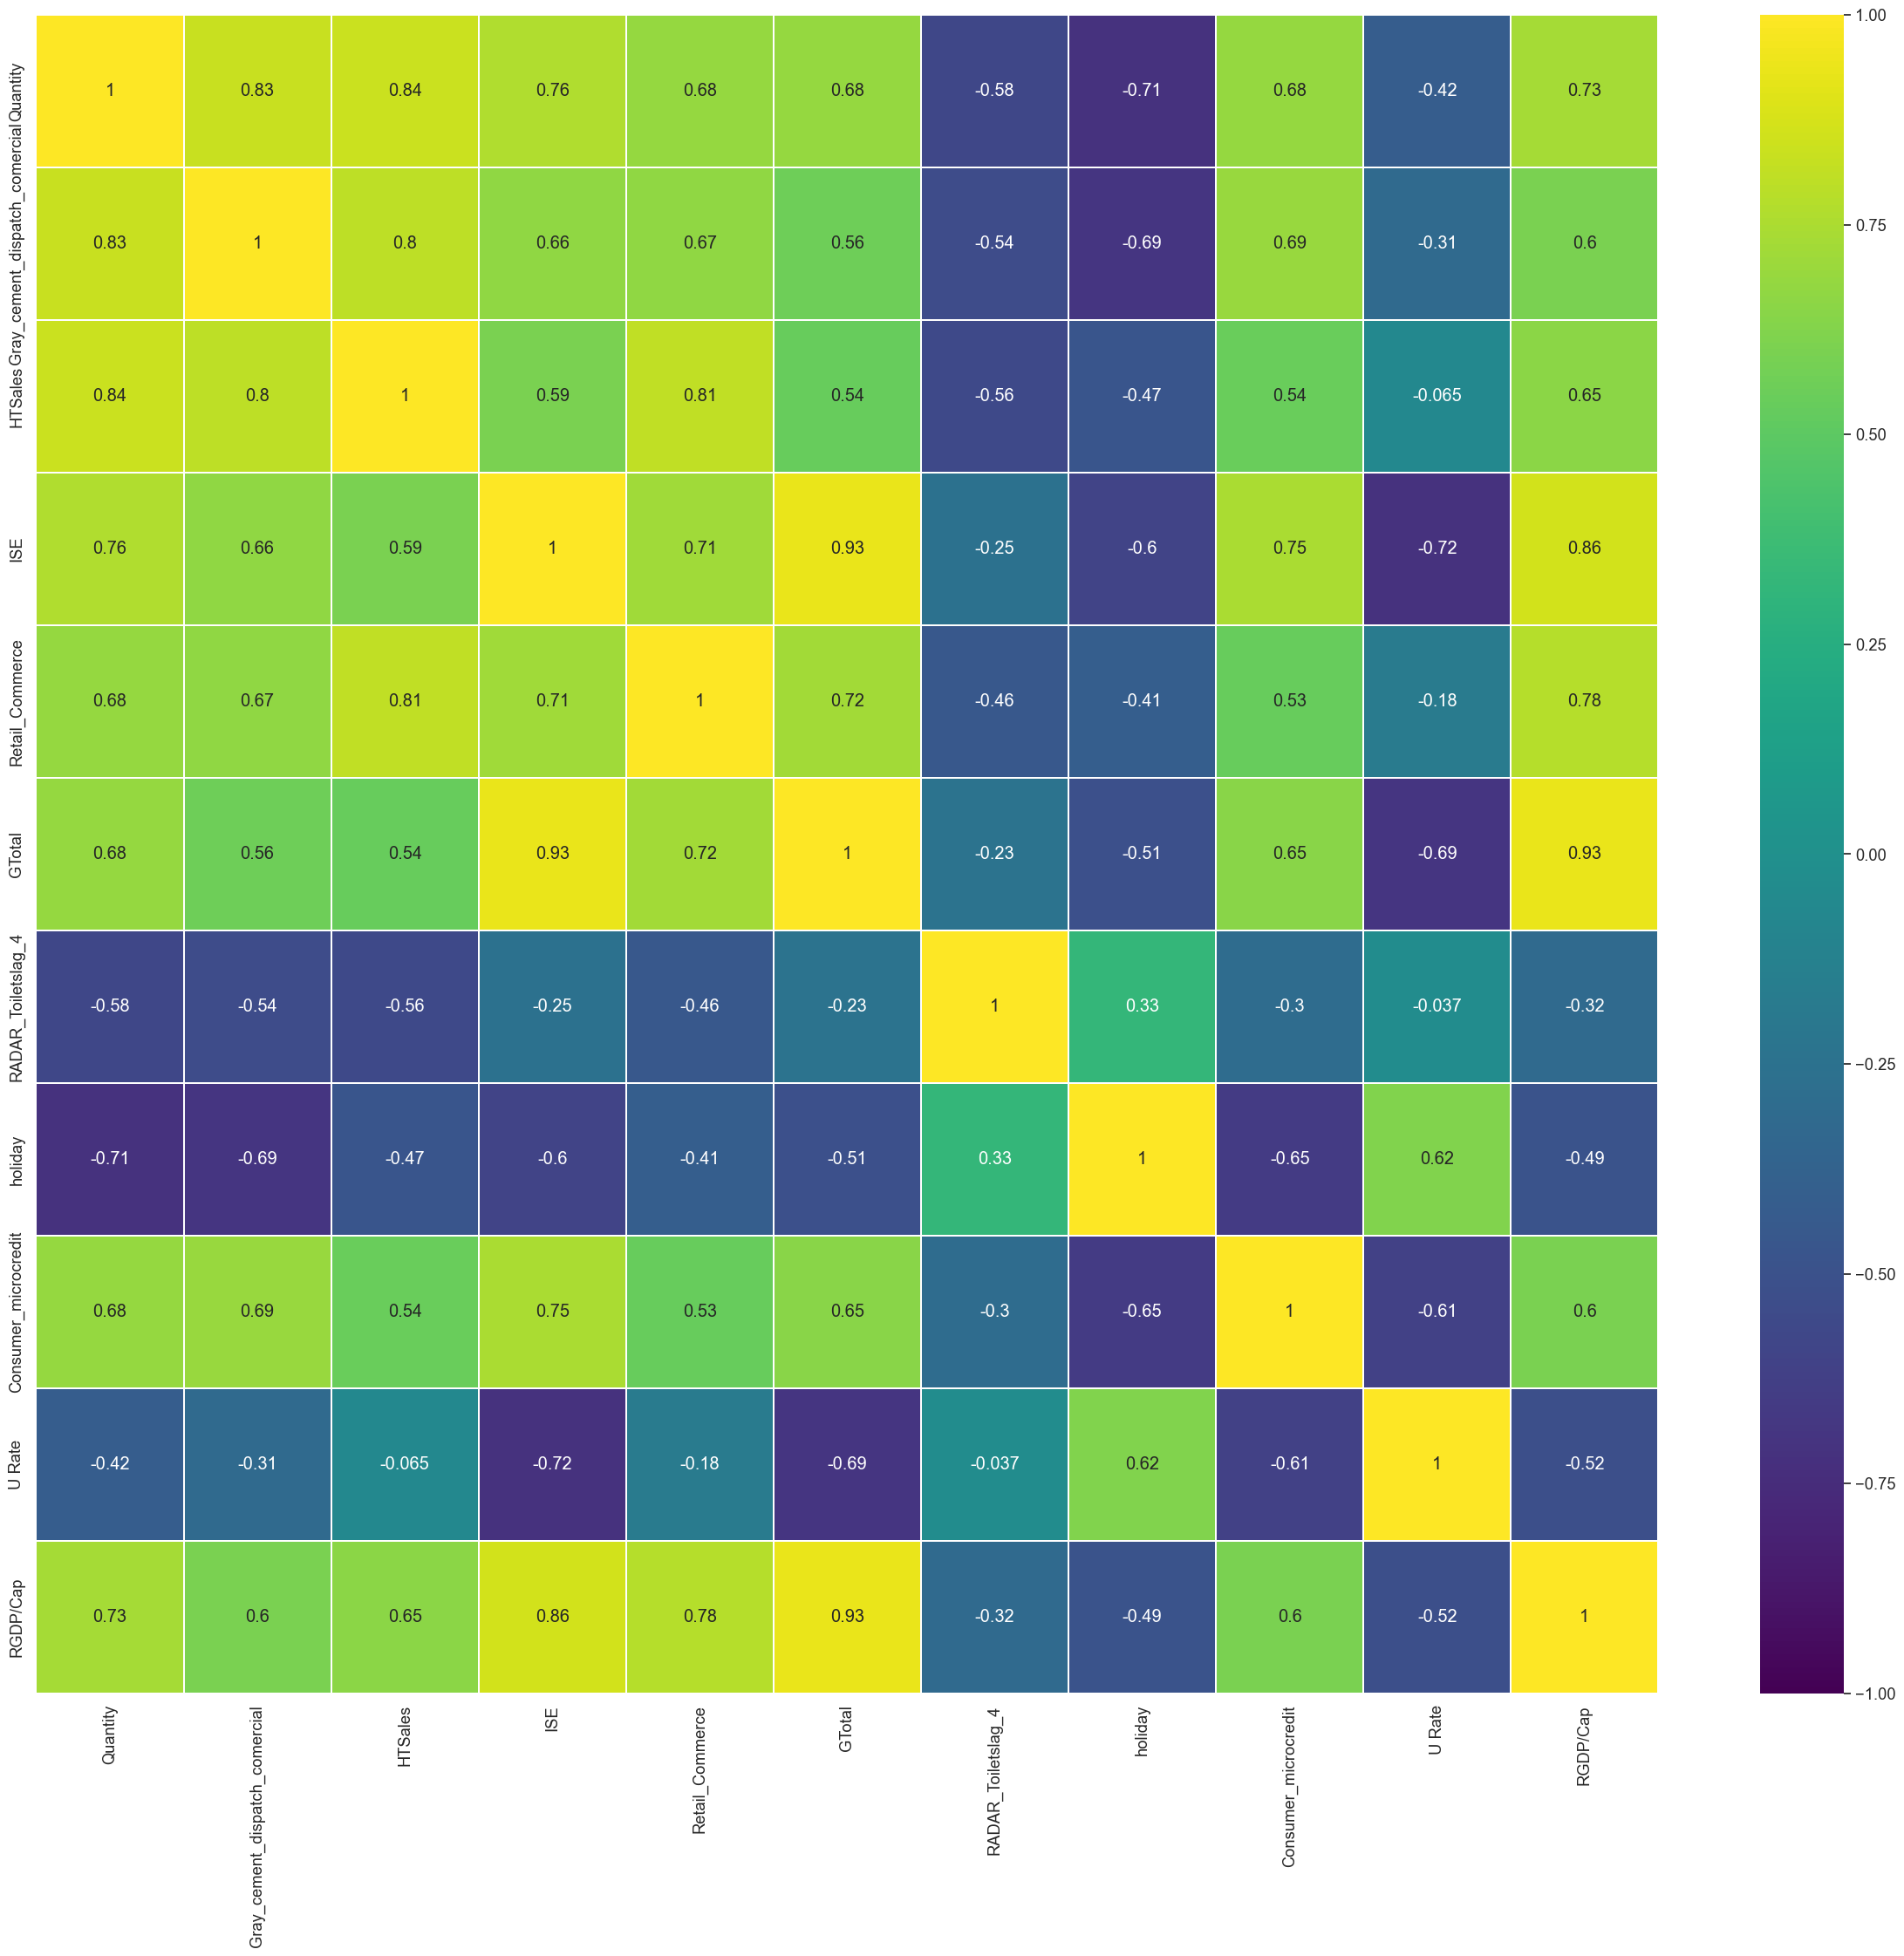

In [33]:
combined_var10_Correlation = corona_combined_var10.corr() 
plt.figure(figsize = (30,25))
sns.heatmap(combined_var10_Correlation, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

### Build a for loop to transform the data automatically

In [34]:
center_data = centering(corona_combined_var10)
nomali_data = nomalization(corona_combined_var10)
standard_data = standardization(corona_combined_var10)
l1_data = L1(corona_combined_var10)
l2_data = L2(corona_combined_var10)
Max_data = Max(corona_combined_var10)

### Build a for loop to select the regression models 

In [35]:
# put the variables into 3 models 
# put transformed dat into 1 list 
data_list = [corona_combined_var10, center_data, nomali_data, standard_data, l1_data, l2_data, Max_data]

for i in data_list:
    print(get_df_name(i))
    linearR(i, 0.4, 5)  
    ridgeR(i, 0.4, 5, 100)
    lassoR(i, 0.4, 5, 0.1)
    print('\n') 

corona_combined_var10
linear regression: 
training metrics:  0.9491429050014537     testing metrics:  0.6194058736368049
ridge regression: 
training metrics:  0.9359379619679691     testing metrics:  0.703301743850631
lasso regression: 
training metrics:  0.9380395883306596     testing metrics:  0.7073608564942181


center_data
linear regression: 
training metrics:  0.9491429050014538     testing metrics:  0.6194058736376602
ridge regression: 
training metrics:  0.9359379619679691     testing metrics:  0.7033017438506304
lasso regression: 
training metrics:  0.9380395883306595     testing metrics:  0.7073608564942178


nomali_data
linear regression: 
training metrics:  0.9491429050014538     testing metrics:  0.6194058737845952
ridge regression: 
training metrics:  0.11443240674343047     testing metrics:  -0.3047218471775224
lasso regression: 
training metrics:  0.0     testing metrics:  -0.4959752193258167


standard_data
linear regression: 
training metrics:  0.9491429050014537     

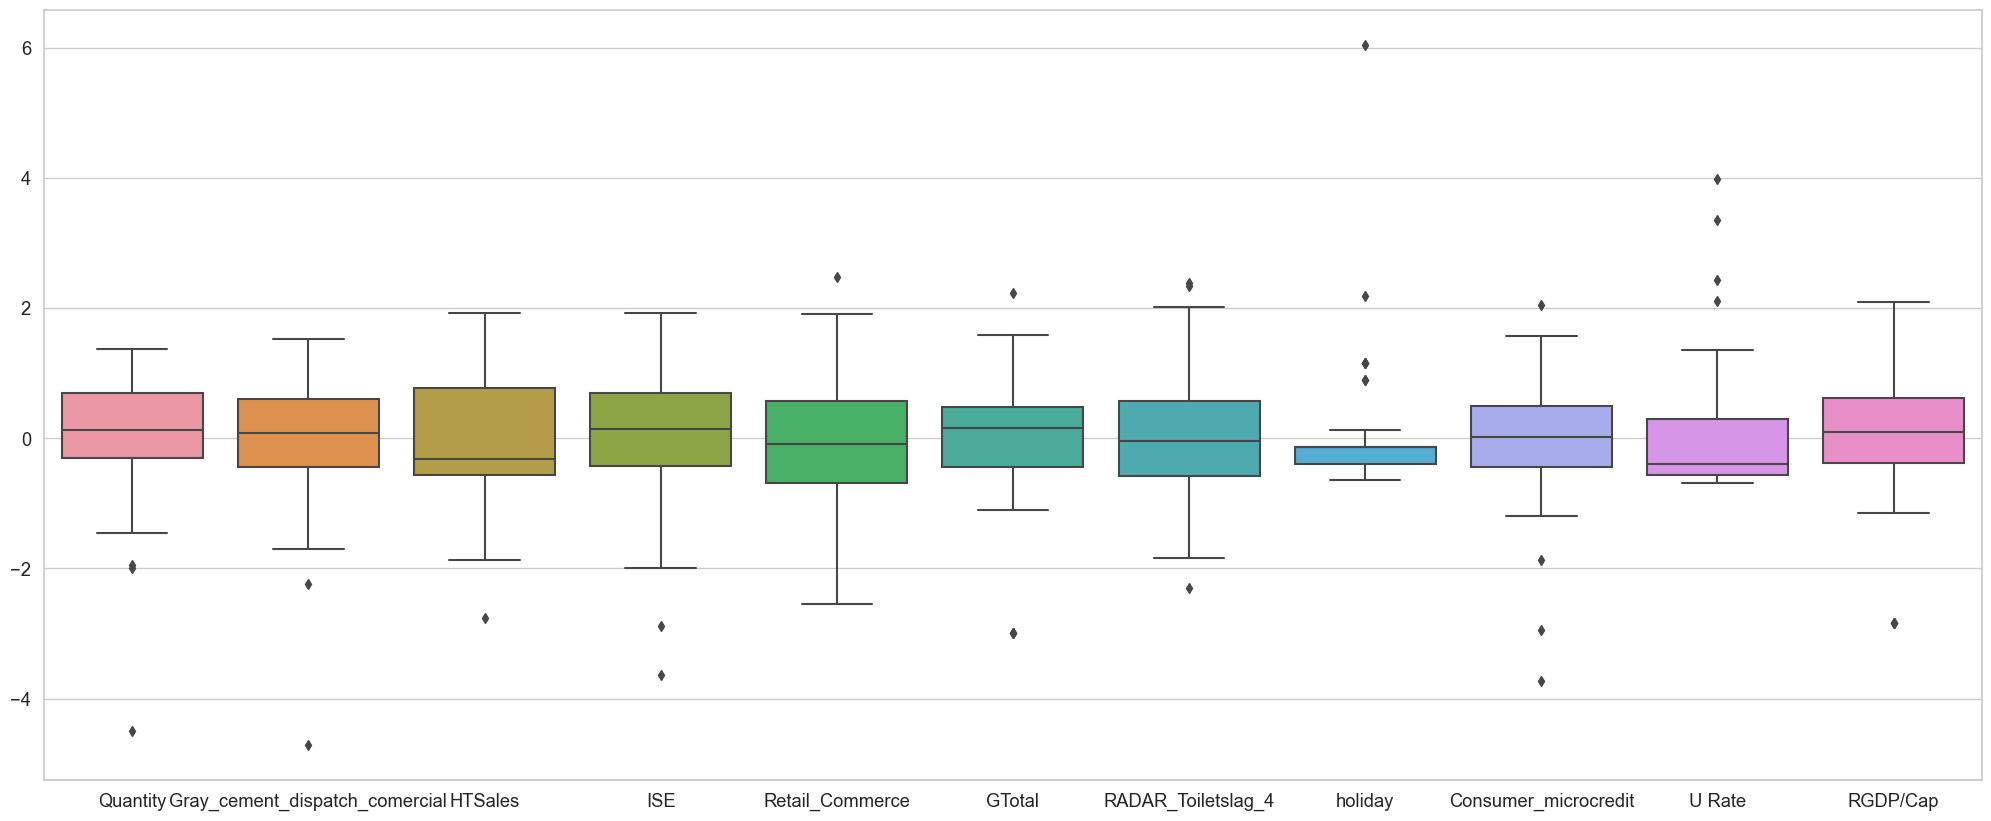

In [36]:
plt.figure(figsize=(25,10))
sns.boxplot(x="variable", y="value",data = standard_data.melt()) #Explore melt function of pandas
plt.xlabel('') #Erase labels
plt.ylabel('') #Erase label
plt.show()

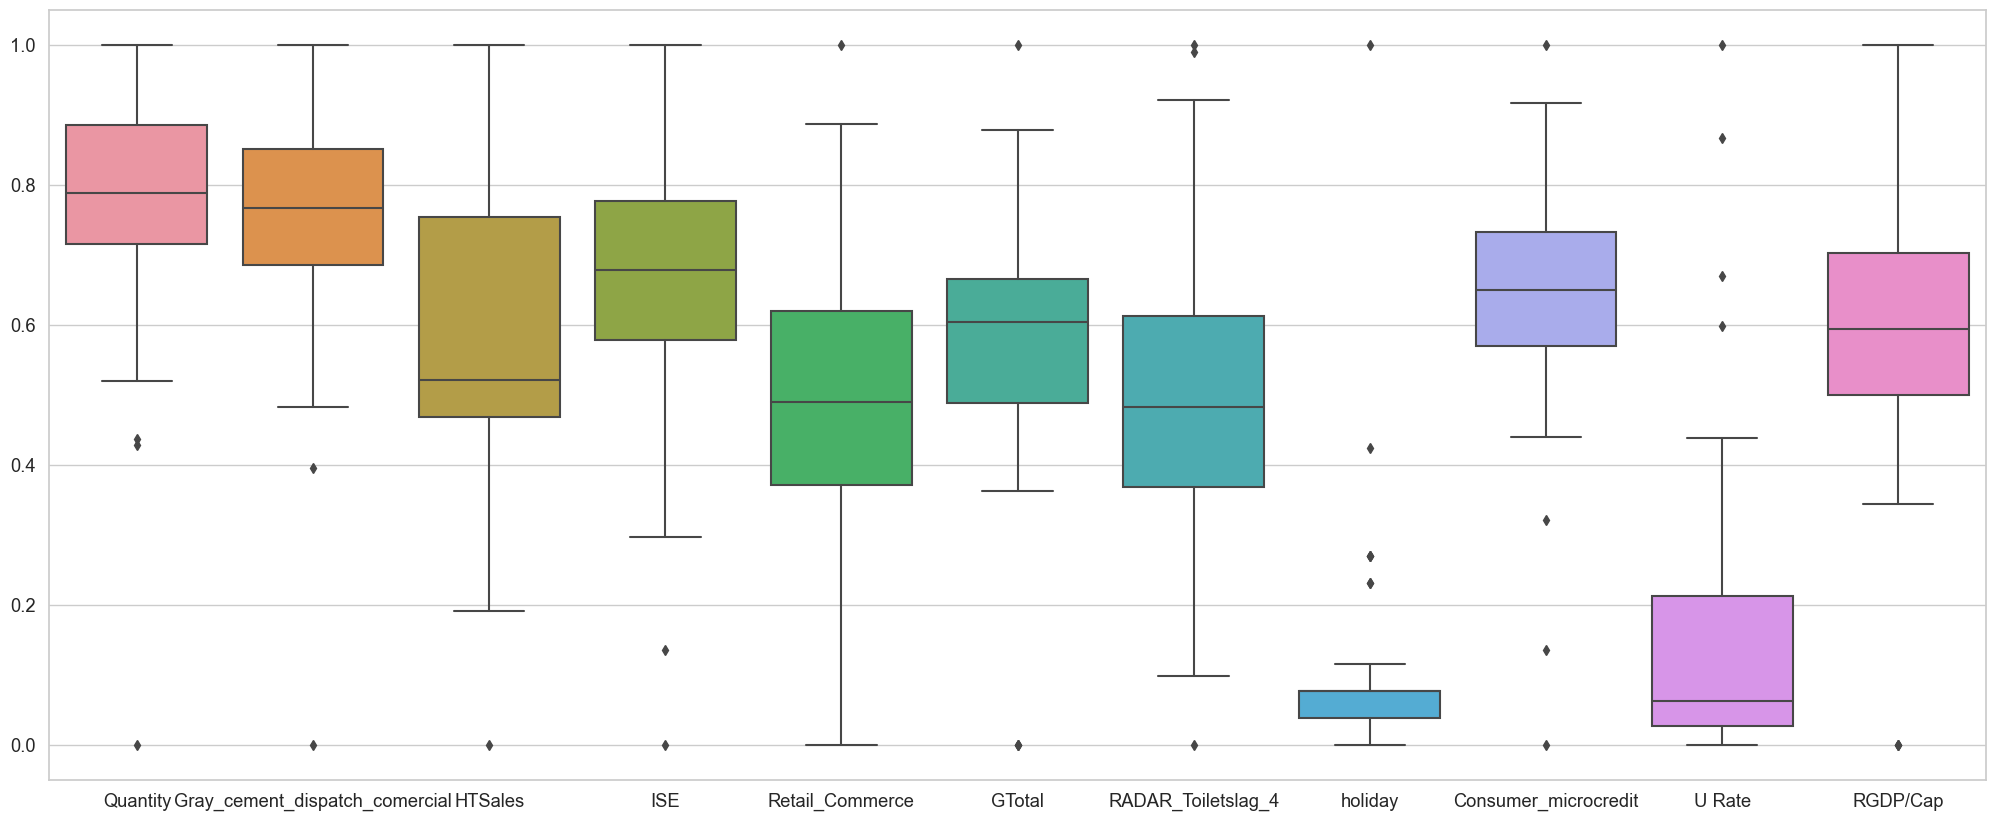

In [37]:
plt.figure(figsize=(25,10))
sns.boxplot(x="variable", y="value",data = nomali_data.melt()) #Explore melt function of pandas
plt.xlabel('') #Erase labels
plt.ylabel('') #Erase label
plt.show()

# Decision Regression Tree

In [38]:
x = corona_combined_var10.drop(['Quantity'], axis=1)

y = corona_combined_var10['Quantity']
#y

# Data Split in testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 5)
print(x_train.shape)
print(x_test.shape)

(32, 10)
(22, 10)


In [39]:
TreeReg = DecisionTreeRegressor() #Creates the function
TreeReg.fit(x_train, y_train) #Train the model  

y_Train_prediction = TreeReg.predict(x_train) #Predictions on training model
y_Test_prediction = TreeReg.predict(x_test)   #Predictions on testing model

#print('Intercept:',TreeReg.intercept_)
#print('Coefficients:', TreeReg.coef_)

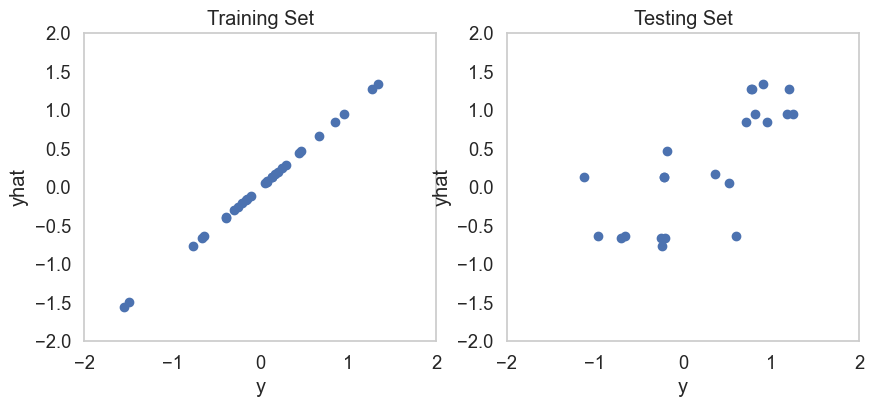

Training Metrics:
R squared: 1.0

Testing Metrics:
R squared: 0.502572436780981


()

In [40]:
Prediction_Plots(y_train, y_Train_prediction, y_test, y_Test_prediction)
Metrics_Printer(y_train, y_Train_prediction, y_test, y_Test_prediction)

100%|█████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 322.89it/s]


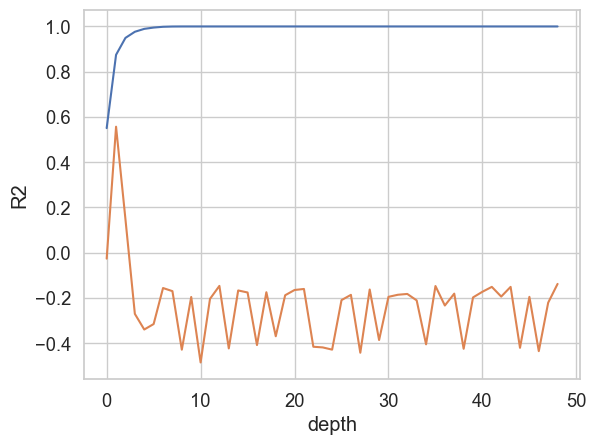

In [41]:
# the model training curve
train_R2 =[]
test_R2=[]

for depth in tqdm(range(1,50)):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 5) 
    dtree = DecisionTreeRegressor(max_depth=depth)
    dtree.fit(x_train,y_train)
    y_Train_prediction = dtree.predict(x_train) #Predictions
    y_Test_prediction = dtree.predict(x_test) #Predictions
    train_R2.append(metrics.r2_score(y_train,y_Train_prediction))
    test_R2.append(metrics.r2_score(y_test, y_Test_prediction))

plt.plot(train_R2)
plt.plot(test_R2)
plt.ylabel('R2')
plt.xlabel('depth')
plt.show()

### Decision Tree Multiple run

In [42]:
Tree_Train_R2 = []
Tree_Test_R2 = []
for i in tqdm(range(1000)):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    TreeReg = DecisionTreeRegressor(max_depth = 10)
    TreeReg.fit(x_train, y_train)
    y_Train_prediction = TreeReg.predict(x_train)  #Predictions on testing model
    y_Test_prediction = TreeReg.predict(x_test)  #Predictions on testing model
    Tree_Train_R2.append(metrics.r2_score(y_train, y_Train_prediction))
    Tree_Test_R2.append(metrics.r2_score(y_test, y_Test_prediction))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.63it/s]


### Linear Regression multiple runs

In [43]:
LR_Train_R2 = []
LR_Test_R2 = []
for i in tqdm(range(1000)):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    LinearReg = LinearRegression() #Creates the function
    LinearReg.fit(x_train, y_train) #Train the model
    y_Train_prediction = LinearReg.predict(x_train)  #Predictions on testing model
    y_Test_prediction = LinearReg.predict(x_test)  #Predictions on testing model
    LR_Train_R2.append(metrics.r2_score(y_train, y_Train_prediction))
    LR_Test_R2.append(metrics.r2_score(y_test, y_Test_prediction))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.14it/s]


In [44]:
Train = pd.DataFrame(list(zip(Tree_Train_R2, LR_Train_R2)))
Test = pd.DataFrame(list(zip(Tree_Test_R2, LR_Test_R2)))

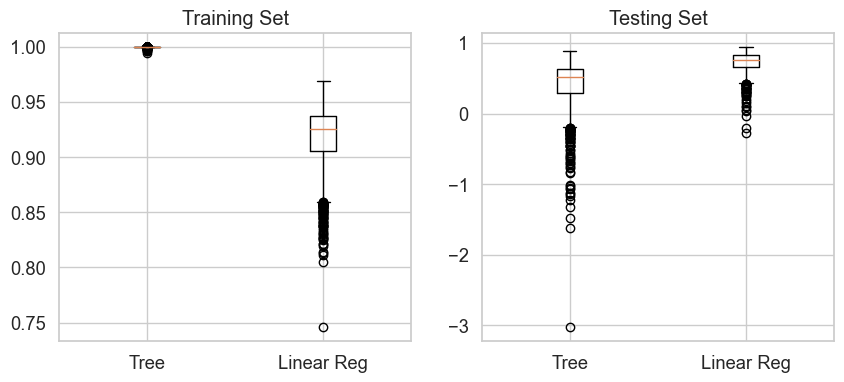

In [45]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].boxplot(Train)
ax[0].set_title('Training Set')
ax[0].set_xticklabels(['Tree','Linear Reg'])

ax[1].boxplot(Test)
ax[1].set_title('Testing Set')
ax[1].set_xticklabels(['Tree','Linear Reg'])

plt.show()